In [1]:
#Turn off gene X and protein x decays. Once x falls below threshold, gene Y turns off and protein y decays.
#start with increase of x. keep steady. then decay.
#y will start at some time t. when x reaches some threshold, turn y off.

#decay works
#Now implement a decay that starts only when a dependent protein level drops to a certain number.
#Need to ensure the dependent protein is dropping so derivative needs to be negative as well.


In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import sys
from ff1 import *

In [2]:
decay_interval = {'x': [0],'y':[0],'z':[0]}

In [3]:
class decay():

    def __init__(self, protein):
        self.p = protein
        self.ss = float(beta[self.p])/float(alpha[self.p])

    def s_ode(self, ss, t, b, c):
        dydt_2 = np.array(-1 * alpha[self.p] * ss)
        return dydt_2

    def plvl_decay(self):
        self.time_decay()
        dd,ee,ff = time_interval[self.p]
        y_out = odeint(self.s_ode, np.array(self.ss), np.linspace(dd,ee,ff), args=(self.ss, alpha[self.p]))
        return y_out

    def time_decay(self):
        x,y,z = time_interval[self.p]	#grab time where protein increase -> steady
        decay_interval[self.p] = (y,y+3,z)	#start decay at end of time interval

In [4]:
def threshold(protein):	#check at what times predecessors hit minimum activation lvl

    for i in min_input[protein]:
        if i == None:	#empty set
            pass	
        else:	#has some minimum required protein level predecessor 
            predecessor_time(protein, i)

            if type(time_interval[protein]) is tuple:
                pass
            else:
                start = time_interval[protein]								#create interval of time starting
                time_interval[protein] = (start, start + 3, 100)	#when last requirement met.    

In [5]:
def parent_check():#runs check to see whether all parent conditions are satisfied
    pass

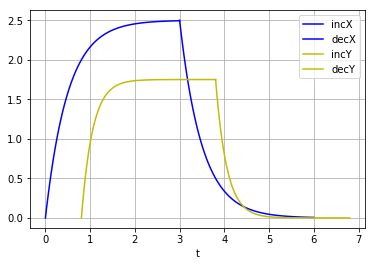

In [6]:
xi = p_time('x')
xii = xi.p_level()	
xd = decay('x')
xdd = xd.plvl_decay()
threshold('y')
yi = p_time('y')
yii = yi.p_level()
yd = decay('y')
ydd = yd.plvl_decay()


#Can clean up below using loop.
a,b,c = time_interval['x']
d,e,f = decay_interval['x']
g,h,i = time_interval['y']
j,k,l = decay_interval['y']

plt.plot(np.linspace(a,b,c), xii[:,0], 'b', label = 'incX')	
plt.plot(np.linspace(d,e,f), xdd[:,0], 'b', label = 'decX')	
plt.plot(np.linspace(g,h,i), yii[:,0], 'y', label = 'incY')	
plt.plot(np.linspace(j,k,l), ydd[:,0], 'y', label = 'decY')	
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()